<a href="https://colab.research.google.com/github/RosanaAlves/Descargas-Atmosfericas/blob/main/Analise_Descritiva_v01_11-12-23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analises descritivas sobre descargas atmosféricas no estado de Minas Gerais


Este estudo conta com dados de descargas atmosféricas coletadas durante o ano de 2022 no Estado de Minas Gerais.

De acordo com o INPE (Instituto Nacional de Pesquisas Espaciais), descargas atmosféricas são descargas elétricas de grande extensão (alguns quilômetros) e de grande intensidade (picos de intensidade de corrente acima de um quiloàmpere), que ocorrem devido ao acúmulo de cargas elétricas em regiões localizadas da atmosfera, em geral dentro de tempestades.
Elas podem ocorrer tanto no interior de uma nuvem, como entre nuvens ou entre uma nuvem e a terra.

É importante estudar esse tipo de evento, a fim de poder evitá-lo ou ainda, reduzir seus efeitos. Através de análises, é possível verificar a existência de algum tipo de padrão em sua ocorrência, principalmente,  no caso de descargas entre nuvem e terra.
Essas descargas podem ocasionar muitos prejuízos em plantações, criações de animais e aparelhos eletrodomésticos.

 Sendo assim, o objetivo deste estudo é fazer uma análise descritiva dos dados, utilizando linguagem Python. Os resultados são apenas para apontamentos e suposições que poderão ser aprofundadas em um estudo posterior.


In [1]:
# pip install folium
# pip install geopandas matplotlib

## Análise descritiva

In [2]:
# Bibliotecas

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import folium
import geopy
import geopandas as gpd
from shapely.geometry import Point


In [59]:
# Carregando o arquivo csv

dados_df = pd.read_csv("https://raw.githubusercontent.com/RosanaAlves/Descargas-Atmosfericas/main/dataset_2022.csv?token=GHSAT0AAAAAACLWQPSX2AR6C7RVXDFEM2AOZL6OMDQ")
dados_df;

In [60]:
# Alterando a primeira letra do nome de cada coluna.

dados_df.columns = dados_df.columns.str.strip().str.capitalize()
dados_df

,Data,Latitude,Longitude,Tipo
0,2022-01-01 16:55:56-03:00,-20.326783,-45.989391,0
1,2022-01-01 16:55:56-03:00,-20.322183,-45.987291,0
2,2022-01-01 16:55:56.985000-03:00,-20.337263,-45.975291,1
3,2022-01-01 16:55:56.997000-03:00,-20.334103,-45.985891,0
4,2022-01-01 16:55:57-03:00,-20.333383,-46.018591,0
...,...,...,...,...
220696,2022-12-31 21:14:53.433000-03:00,-19.867303,-45.706591,1
220697,2022-12-31 21:14:53.455790-03:00,-19.898383,-45.744691,1
220698,2022-12-31 21:17:14.225225-03:00,-19.898783,-45.743891,1
220699,2022-12-31 21:19:20.140002-03:00,-19.850383,-45.746191,1


In [62]:
df = dados_df
df['Data']

0                2022-01-01 16:55:56-03:00
1                2022-01-01 16:55:56-03:00
2         2022-01-01 16:55:56.985000-03:00
3         2022-01-01 16:55:56.997000-03:00
4                2022-01-01 16:55:57-03:00
                        ...               
220696    2022-12-31 21:14:53.433000-03:00
220697    2022-12-31 21:14:53.455790-03:00
220698    2022-12-31 21:17:14.225225-03:00
220699    2022-12-31 21:19:20.140002-03:00
220700    2022-12-31 21:21:54.263374-03:00
Name: Data, Length: 220701, dtype: object

In [63]:
# Alterando o formato da coluna Data para data e hora.

df['Data'] = pd.to_datetime(df['Data'])
df['Data']

0               2022-01-01 16:55:56-03:00
1               2022-01-01 16:55:56-03:00
2        2022-01-01 16:55:56.985000-03:00
3        2022-01-01 16:55:56.997000-03:00
4               2022-01-01 16:55:57-03:00
                       ...               
220696   2022-12-31 21:14:53.433000-03:00
220697   2022-12-31 21:14:53.455790-03:00
220698   2022-12-31 21:17:14.225225-03:00
220699   2022-12-31 21:19:20.140002-03:00
220700   2022-12-31 21:21:54.263374-03:00
Name: Data, Length: 220701, dtype: datetime64[ns, pytz.FixedOffset(-180)]

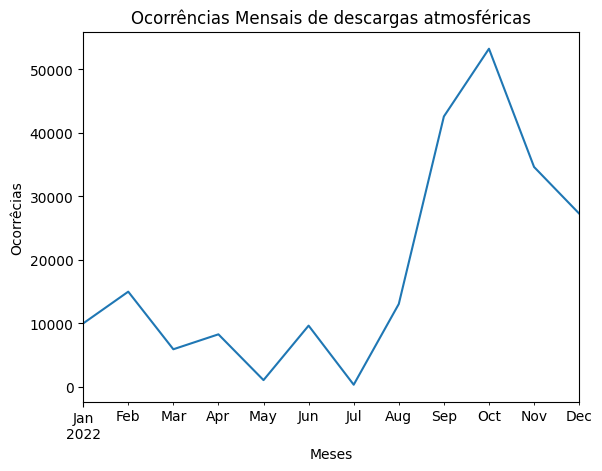

In [64]:
# Plotando a contagem de descargas por mês

df.set_index('Data').resample('M').size().plot() # Agrupando por mês
plt.title('Ocorrências Mensais de descargas atmosféricas')
plt.xlabel('Meses')
plt.ylabel('Ocorrêcias')
plt.show()
#

Segundo INMET (Instituto Nacional de Meteorologia), a estação chuvosa em Minas Gerais, assim como, em toda a Região Sudeste, ocorre entre os meses de outubro a março, porém as primeiras pancadas de chuva, normalmente ocorrem na segunda quinzena de setembro, evidenciando o declínio da estação seca.


Olhando para o gráfico, as maiores ocorrências de descargas atmosféricas ocorreram entre agosto e dezembro de 2022, tendo seu maior pico em outubro. Exatamente como era esperado, já que é período de chuvas. Contudo, esse pico pode evidenciar que a transição para a estação chuvosa influencia a incidência de raios, pois, após esse pico houve uma queda.


In [68]:
# Frequencia dos tipos de descargas

df['Tipo'].value_counts()

1     142180
0      78407
40       114
Name: Tipo, dtype: int64

O tipo (0) indica descarga nuvem-solo e o tipo (1) intranuvem, o tipo (40) não foi declarado, por isso, pode ser considerado um valor inconsistente.
Os valores inconsistentes não podem ser apagados sem antes serem analisados, sendo assim, é necessário uma investigação mais profunda.

In [67]:
# Selecionando apenas o periodo de maior incidencia de descargas

df_me = df[(df['Data'] >= '2022-08-01') & (df['Data'] <= '2022-12-31')]
df_me.shape
df_me['Tipo'].value_counts()


1     116729
0      53829
40       114
Name: Tipo, dtype: int64

Todas as ocorrências do valor (40), foram durante a estação chuvosa.


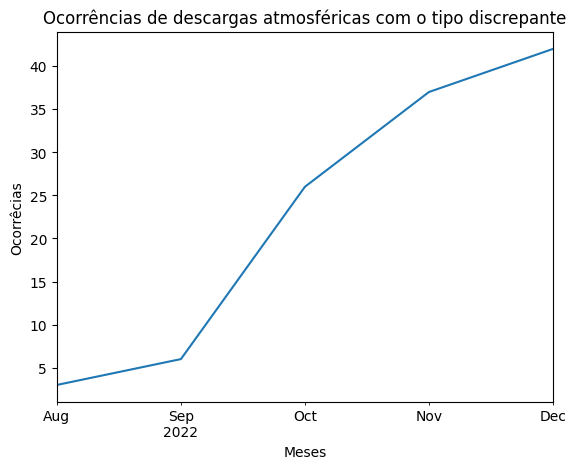

In [71]:
# filtrando valor inconsistente

df_filtrado = df[df['Tipo'] == 40]

df_filtrado.set_index('Data').resample('M').size().plot() # Agrupando por mês
plt.title('Ocorrências de descargas atmosféricas com o tipo discrepante')
plt.xlabel('Meses')
plt.ylabel('Ocorrêcias')
plt.show()


As ocorrências tiveram um comportamento crescente.


In [75]:
import geopy
# Create a Geocoder object
geocoder = geopy.Nominatim(user_agent="my_user_agent")

# Get the location names for each latitude and longitude
for lat, lng in zip(df_filtrado['Latitude'], df_filtrado['Longitude']):
    location = geocoder.reverse((lat, lng))


df_filtrado['Nome'] = location.address

<ipython-input-75-565f18f5b1e0>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [76]:
df_filtrado['Nome']

51833     Bambuí, Região Geográfica Imediata de Formiga,...
56789     Bambuí, Região Geográfica Imediata de Formiga,...
57885     Bambuí, Região Geográfica Imediata de Formiga,...
71024     Bambuí, Região Geográfica Imediata de Formiga,...
72412     Bambuí, Região Geográfica Imediata de Formiga,...
                                ...                        
219356    Bambuí, Região Geográfica Imediata de Formiga,...
219386    Bambuí, Região Geográfica Imediata de Formiga,...
219792    Bambuí, Região Geográfica Imediata de Formiga,...
220072    Bambuí, Região Geográfica Imediata de Formiga,...
220547    Bambuí, Região Geográfica Imediata de Formiga,...
Name: Nome, Length: 114, dtype: object

In [47]:
# Coordenadas do centro de Minas Gerais


latitude_centro = -18.5122
longitude_centro = -44.5550

# Criar um mapa centrado em Minas Gerais
mapa_mg = folium.Map(location=[latitude_centro, longitude_centro], zoom_start=7)

# Adicionar marcadores para cada cidade no DataFrame
for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Tipo'],
        icon=folium.Icon(color='red')
    ).add_to(mapa_mg)

# Exibir o mapa
mapa_mg



### Dados inconsistentes



1     142180
0      78407
40       114
Name: Tipo, dtype: int64

Após agrupar os tipos de descargas foi encontrado um valor discrepante. Esse valor não pode ser retirado do banco de dados sem antes ser analisado e verificado.


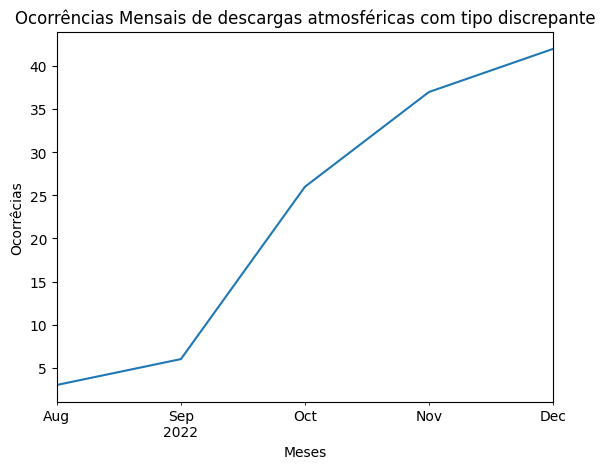

In [46]:
df_filtrado.set_index('Data').resample('M').size().plot() # Agrupando por mês
plt.title('Ocorrências Mensais de descargas atmosféricas com tipo discrepante')
plt.xlabel('Meses')
plt.ylabel('Ocorrêcias')
plt.show()

<Axes: xlabel='Latitude', ylabel='Longitude'>

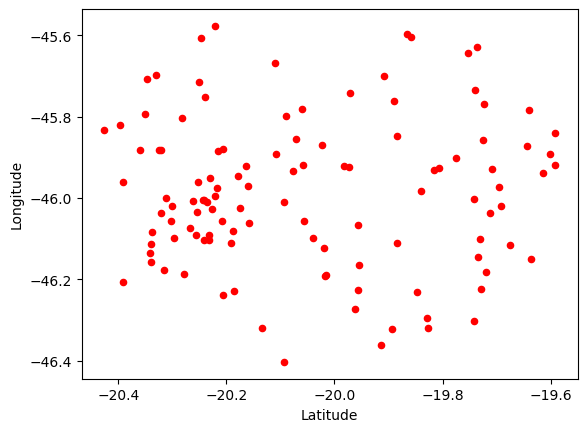

In [48]:
df_filtrado.plot(x='Latitude', y='Longitude', kind='scatter', color='red')

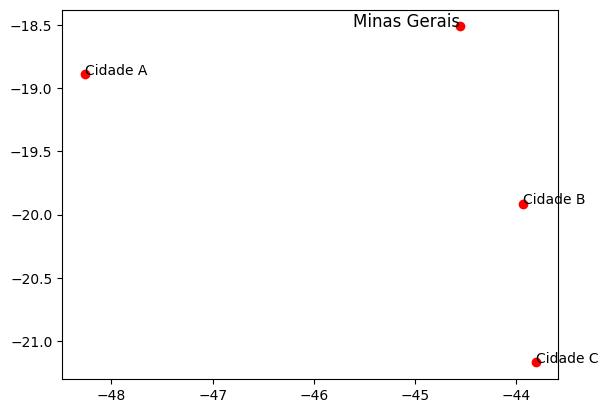

In [43]:
  # Construindo os mapas

  import matplotlib.pyplot as plt

# Coordenadas do centro de Minas Gerais
latitude_centro = -18.5122
longitude_centro = -44.5550

# Coordenadas das cidades fictícias
cidades = {'Cidade A': (-18.8918, -48.2625), 'Cidade B': (-19.9167, -43.9333), 'Cidade C': (-21.1700, -43.8100)}

# Criar um gráfico de dispersão
plt.scatter([longitude_centro] + [coord[1] for coord in cidades.values()],
            [latitude_centro] + [coord[0] for coord in cidades.values()], c='red')

# Adicionar rótulos para as cidades
for cidade, coord in cidades.items():
    plt.text(coord[1], coord[0], cidade)

# Adicionar rótulo para o centro de Minas Gerais
plt.text(longitude_centro, latitude_centro, 'Minas Gerais', fontsize=12, ha='right')

# Exibir o gráfico
plt.show()



In [44]:
import plotly.express as px

# DataFrame com dados fictícios
dados = pd.DataFrame({
    'Latitude': [-18.8918, -19.9167, -21.1700],
    'Longitude': [-48.2625, -43.9333, -43.8100],
    'Nome': ['Cidade A', 'Cidade B', 'Cidade C']
})

# Criar um mapa usando Plotly Express
figura = px.scatter_geo(dados, lat='Latitude', lon='Longitude', text='Nome', size_max=30)

# Atualizar layout para centrar no Brasil
figura.update_geos(center=dict(lon=longitude_centro, lat=latitude_centro), projection_scale=7)

# Exibir o mapa
figura.show()


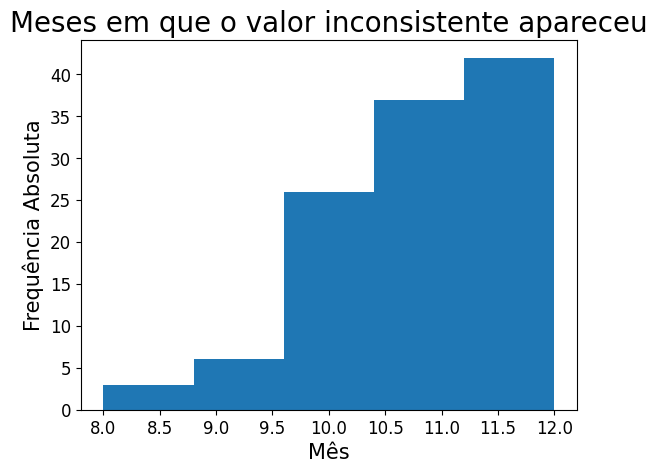

In [18]:
# Histograma

plt.hist(df_filtrado['Mes'],5, rwidth=1)
plt.title('Meses em que o valor inconsistente apareceu', fontsize = 20)
plt.xlabel('Mês',fontsize = 15)
plt.ylabel('Frequência Absoluta', fontsize = 15)
plt.tick_params(labelsize = 12)


Foi de agosto a dezembro que esses registros apareceram.

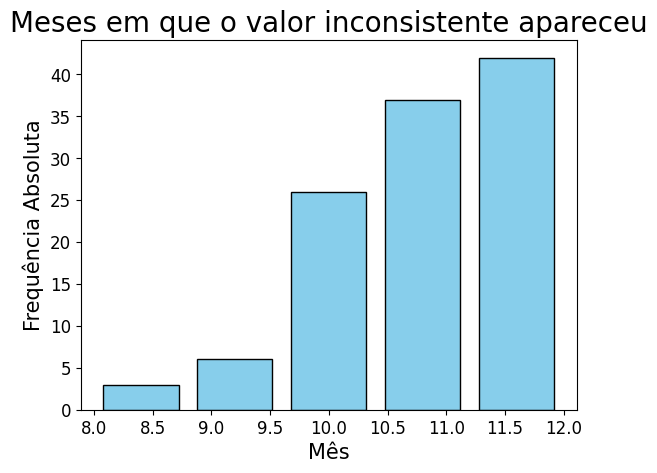

In [19]:
# Plotar o histograma

plt.hist(df_filtrado['Mes'], bins=5, rwidth=0.8, color='skyblue', edgecolor='black')
# Adicionar títulos e rótulos
plt.title('Meses em que o valor inconsistente apareceu', fontsize=20)
plt.xlabel('Mês', fontsize=15)
plt.ylabel('Frequência Absoluta', fontsize=15)

    # Ajustar o tamanho das fontes nos rótulos
plt.tick_params(labelsize=12)

    # Exibir o histograma
plt.show()





## Mapa

In [20]:
folium.Map(location = [-20.326783,-45.989391], zoom_start = 9);


In [22]:
# nome = df['nome']
mapa = folium.Map(location=[-20.326783,-45.989391],
                  zoom_start=12.25)
mapa